## Mini-Proyecto 1 - Análisis Mutivariado para la computación afectiva

---



**Autores:**  

*   Santiago Torres Velásquez
*   Santiago Narváez Toro

**Tratamiento de Señales III**

**Facultad de Ingeniería**

**Universidad de Antioquia**

## 1. Descripción

La emoción es un proceso psicofisiológico desencadenado por la percepción consciente e inconsciente de objetos o situaciones. Las emociones están relacionadas con el estado de ánimo, la personalidad, y la motivación, y desempeñan un papel importante en la comunicación humana, ya sea verbalmente o a través de señales no verbales como expresiones faciales y gestos.

La mayoría de los sistemas de interacción humano-computadora carecen de inteligencia emocional y no pueden identificar los estados emocionales humanos ni tomar acciones adecuadas en consecuencia. La computación afectiva busca abordar esta deficiencia al detectar señales emocionales durante la interacción humano-computadora y generar respuestas emocionales.

La evaluación de las emociones generalmente se realiza mediante el análisis de expresiones emocionales y señales fisiológicas de los usuarios. Los estudios se han centrado principalmente en analizar las expresiones faciales y el habla para determinar el estado emocional de una persona, aunque también se reconoce que las señales fisiológicas, originadas en el sistema nervioso central y periférico, contienen información emocional que puede ser utilizada en la evaluación de las emociones.

## 2. Actividad de aprendizaje
1. Se requiere construir un framework que permita procesar y caracterizar las señales fisiológicas para agruparlas en estados emocionales. Para ello se trabajara con la base de datos DEAPdataset, la cual es un conjunto de datos para el analisis de emociones usando señales de eeg, fisiológicas y de video

In [1]:
# Descargar los archivo equivalente a una persona

#https://drive.google.com/drive/folders/1kKRLehNqEU8Wh5GMwBc-DA1NsOM8y_es
!gdown '1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3'

Downloading...
From: https://drive.google.com/uc?id=1bMObQcIFrNalRmD1LaNuqVSTeqaeGqR3
To: /content/s17.mat
100% 80.7M/80.7M [00:00<00:00, 232MB/s]


2. El objetivo de este mini-proyecto es realizar la caracterizacion de los estados emocionales de la siguiente manera:
• En los equipos de trabajo, se deben escoger mínimo 3 características por cada tipo de señal en la base de datos. La siguiente tabla muestra las características mas relevantes para extraer de un proceso
emocional de las cuales debe escoger dicha cantidad por cada grupo.

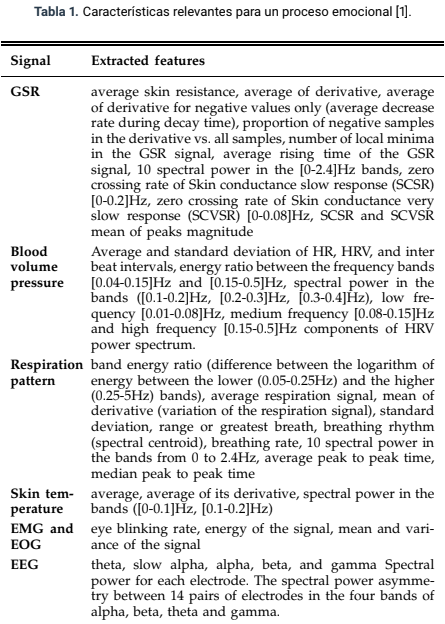

Se debe crear un modulo en Python que realice la extracción de características de tal forma que para cada uno de los 40 videos que inducen estados emocionales, se construya una matriz de la forma ${\bf{X}}\in\mathbb{R}^{N\times D}$, donde N es el número de observaciones (en este caso las realizaciones emocionales), y D es el
número de características resultantes en el proceso de extracción.

In [2]:
# Cargar el archivo .mat
import scipy.io as sc
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import pandas as pd

# Carga de las señales de una sola persona
datosP1 = sc.loadmat('s17.mat')
signals = datosP1['data']
etiquetas = datosP1['labels']
# Esto arrojará un nd array de n_video * id_signal * Ntimepoints

### Extracción de las características para la GSR

- Tiempo promedio de subida de la GSR: El tiempo que lleva que una SCR alcance su amplitud máxima y el tiempo que tarda en volver a la línea de base pueden proporcionar información sobre la intensidad y la duración de la respuesta emocional.

- Promedio de la Derivada Solo para Valores Negativos: Centrarse en los valores negativos de la derivada puede ayudar a capturar respuestas específicas de GSR que pueden estar relacionadas con cambios emocionales.

- Potencia Espectral en Bandas de 0-2.4 Hz: El análisis en el dominio de la frecuencia puede revelar patrones relacionados con las respuestas emocionales. Analizar la potencia espectral en este rango de frecuencia puede ayudar a identificar firmas emocionales específicas.

Estas características puede proporcionar un buen equilibrio entre capturar tendencias generales y respuestas emocionales específicas en los datos.

In [3]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA GSR.

def caracteristicas_GSR (gsr_data):
  #CÁLCULO PARA LA GSR.

  # Umbral para detectar una respuesta galvánica de la piel (GSR).
  umbral = 100

  # Encuentra los índices donde la GSR cruza el umbral (respuesta galvánica).
  indices_gsr = np.where(gsr_data > umbral)[0]

  # Inicializa una lista para almacenar los tiempos de subida.
  tiempos_subida = []

  # Calcula el tiempo promedio de subida entre respuestas galvánicas.
  for i in range(1, len(indices_gsr)):
      tiempo_subida = indices_gsr[i] - indices_gsr[i - 1]
      tiempos_subida.append(tiempo_subida)

  # Calcula el tiempo promedio de subida
  tiempo_promedio_subida = np.mean(tiempos_subida)

  # CÁLCULO PARA EL PROMEDIO DE LA DERIVADA PARA VALORES NEGATIVOS.

  # Calcula la derivada de la señal de GSR.
  gsr_derivative = np.diff(gsr_data)

  # Calcula el promedio de la derivada solo para valores negativos.
  average_derivative_negative = np.mean(gsr_derivative[gsr_derivative < 0])


  # CÁLCULO POTENCIA ESPECTRAL EN BANDAS 0-2.4 Hz.
  b, a = signal.butter(4, 2.4/128, 'lowpass', analog=False)
  filtered = signal.lfilter(b, a, gsr_data)

  #Se realiza la fft a la señal filtrada
  gsr_ftt = np.fft.fft(filtered)
  frecuencias_gsr = np.fft.fftfreq(len(gsr_ftt), 1.0 / 128)

  # Encuentra los índices de las frecuencias_gsr en la banda de 0 a 2.4 Hz
  indices = np.where((frecuencias_gsr >= 0.) & (frecuencias_gsr <= 2.4))[0]

  # Calcula las potencias espectrales en la banda de 0 a 2.4 Hz
  potencias_banda = np.abs(gsr_ftt[indices])**2

  # Toma las 10 primeras potencias
  indices_ten = np.argsort(potencias_banda)[::-1][:10]
  potencias_ten = potencias_banda[indices_ten]
  frecuencia_ten = frecuencias_gsr[indices][indices_ten]

  vector_gsr = np.array([tiempo_promedio_subida, average_derivative_negative])
  vector_gsr = np.hstack((vector_gsr, potencias_ten, frecuencia_ten))

  return vector_gsr

Estos datos proporcionan información valiosa sobre la señal de GSR y pueden ser indicativos de la presencia de respuestas emocionales. Sin embargo, la interpretación precisa de estos valores en términos de emociones específicas requeriría más contexto y posiblemente la comparación con datos de referencia o un análisis multimodal que incluya otras señales fisiológicas.


### Extracción de las características para la presión y volumen de la sangre

- Promedio y Desviación Estándar del Pulso: Estas dos características proporcionan información básica sobre la frecuencia cardíaca y su variabilidad. El promedio del pulso puede indicar el nivel de activación general, mientras que la desviación estándar refleja la variabilidad del ritmo cardíaco. Ambas pueden ser útiles para evaluar la actividad cardiovascular en respuesta a las emociones.

- Ratio de Energía entre Bandas de Frecuencia 0.04-0.15 Hz y 0.15-0.5 Hz: Este índice refleja la distribución de energía en diferentes bandas de frecuencia en el espectro de HRV. La relación entre la baja frecuencia (LF) y la alta frecuencia (HF) se ha utilizado para evaluar el equilibrio entre el sistema nervioso simpático y parasimpático. Esta relación puede proporcionar información sobre la respuesta del sistema nervioso autónomo a las emociones.

- Potencia Espectral en las bandas [0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz: La potencia espectral en esta banda de frecuencia específica se ha asociado con la actividad del sistema nervioso parasimpático y puede ser relevante para evaluar la influencia de las emociones en la regulación cardíaca. Un aumento en esta potencia podría indicar una respuesta parasimpática dominante en ciertas situaciones emocionales.

Estas características pueden dar información valiosa de cómo la presión y el volumen están relacionadas con las respuestas emocionales.

In [4]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA PRESIÓN Y VOLUMEN EN LA SANGRE.

def caracteristicas_HRV (hrv_data):

  matriz_hrv = np.empty((0,6)) # Inicialmente una matriz vacía

  # 1. Promedio y Desviación Estándar del Pulso
  promedio_pulso = np.mean(hrv_data)
  desviacion_estandar_pulso = np.std(hrv_data)

  # 2. Ratio de Energía entre Bandas de Frecuencia 0.04-0.15 Hz y 0.15-0.5 Hz

  b, a = signal.butter(4, [0.04/128, 0.5/128], 'bandpass', analog=False)
  filtered = signal.lfilter(b, a, hrv_data)

  hrv_ftt = np.fft.fft(filtered)
  frecuencias_hrv = np.fft.fftfreq(len(hrv_ftt), 1.0 / 128)

  low_freq_band_ind = np.where((frecuencias_hrv >= 0.04) & (frecuencias_hrv <= 0.15))[0]
  high_freq_band_ind = np.where((frecuencias_hrv > 0.15) & (frecuencias_hrv <= 0.5))[0]

  potencias_low_band = np.abs(hrv_ftt[low_freq_band_ind])**2
  potencias_high_band = np.abs(hrv_ftt[high_freq_band_ind])**2

  ratio_energia_lf_hf = np.sum(potencias_low_band) / np.sum(potencias_high_band)

  # 3. Potencia Espectral en las bandas [0.1-0.2]Hz, [0.2-0.3]Hz, [0.3-0.4]Hz
  banda_01_02 = np.where((frecuencias_hrv >= 0.1) & (frecuencias_hrv <= 0.2))[0]
  banda_02_03 = np.where((frecuencias_hrv > 0.2) & (frecuencias_hrv <= 0.3))[0]
  banda_03_04 = np.where((frecuencias_hrv > 0.3) & (frecuencias_hrv <= 0.4))[0]

  potencia_banda_01_02 = np.sum(np.abs(hrv_ftt[banda_01_02])**2)/ (len(hrv_data) / 128)
  potencia_banda_02_03 = np.sum(np.abs(hrv_ftt[banda_02_03])**2)/ (len(hrv_data) / 128)
  potencia_banda_03_04 = np.sum(np.abs(hrv_ftt[banda_03_04])**2)/ (len(hrv_data) / 128)

  vector_hrv = np.array([promedio_pulso, desviacion_estandar_pulso, ratio_energia_lf_hf, potencia_banda_01_02, potencia_banda_02_03, potencia_banda_03_04])
  return vector_hrv

#print (xHRV)

Si bien estos resultados ofrecen información sobre la variabilidad cardíaca y la actividad autonómica, no proporcionan indicios directos de emociones. Para comprender mejor las relaciones entre estas características, es importante realizar análisis adicionales.

### Extracción de las características para el patrón de respiración

- Diferencia entre el Logaritmo de Energía entre las Bandas Bajas y Altas: Esta característica puede proporcionar información sobre cómo se distribuye la energía en diferentes bandas de frecuencia en la señal de respiración. Un valor alto en esta característica podría indicar una mayor influencia de la respiración lenta y profunda (baja frecuencia) en comparación con la respiración rápida y superficial (alta frecuencia). Esto podría estar relacionado con estados emocionales de relajación y calma versus estados emocionales de excitación.

- Frecuencia Respiratoria: La desviación estándar de la respiración se refiere a la variabilidad en la frecuencia respiratoria de una persona, y esta variabilidad puede estar relacionada con cambios emocionales.

- 10 Potencias Espectrales en Bandas de 0 a 2.4 Hz: Estas potencias espectrales en diferentes bandas de frecuencia pueden proporcionar información sobre la distribución de energía en la señal de respiración. Dado que abarcan una amplia gama de frecuencias, pueden ayudar a capturar diferentes patrones de respiración asociados con emociones. Por ejemplo, las frecuencias más bajas pueden estar relacionadas con respiración lenta y profunda, mientras que las frecuencias más altas pueden estar relacionadas con respiración rápida y superficial.

Estas tres características pueden ser útiles para analizar cómo el patrón de respiración está relacionado con las respuestas emocionales.

In [5]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA RESPIRACIÓN.
def caracteristicas_RESPIRACION(respiracion_data):

  b, a = signal.butter(4, [0.05/128, 5./128], 'bandpass', analog=False)
  filtered = signal.lfilter(b, a, respiracion_data)

  # 1. Band Energy Ratio (Diferencia entre el Logaritmo de Energía entre las Bandas Bajas y Altas)
  respiracion_fft = np.fft.fft(filtered)
  frecuencias_respiracion = np.fft.fftfreq(len(respiracion_fft), 1.0 / 128)

  low_band = np.where((frecuencias_respiracion >= 0.05) & (frecuencias_respiracion <= 0.25))[0]
  high_band = np.where((frecuencias_respiracion > 0.25) & (frecuencias_respiracion <= 5))[0]

  energia_low = np.sum(np.abs(respiracion_fft[low_band]**2))
  energia_high = np.sum(np.abs(respiracion_fft[high_band]**2))

  band_energy_ratio = np.log(energia_low) - np.log(energia_high)

  # 2. Desviación estándar
  std_respiracion = np.std(respiracion_data)

  # 3. 10 Spectral Power in Bands from 0 to 2.4Hz (10 Potencias Espectrales en Bandas de 0 a 2.4 Hz)
  respiracion_fft = np.fft.fft(filtered)
  frecuencias_respiracion = np.fft.fftfreq(len(respiracion_fft), 1.0 / 128)

  # Encuentra los índices de las frecuencias_respiracion en la banda de 0 a 2.4 Hz
  indices = np.where((frecuencias_respiracion >= 0) & (frecuencias_respiracion <= 2.4))[0]

  # Calcula las potencias espectrales en la banda de 0 a 2.4 Hz
  potencias_banda = np.abs(respiracion_fft[indices])**2

  # Toma las 10 primeras potencias
  indices_ten_respiracion = np.argsort(potencias_banda)[::-1][:10]
  potencias_ten_respiracion = potencias_banda[indices_ten_respiracion]
  frecuencia_ten_respiracion = frecuencias_respiracion[indices][indices_ten_respiracion]

  vector_respiracion = np.array([band_energy_ratio, std_respiracion])
  vector_respiracion = np.hstack((vector_respiracion, potencias_ten_respiracion, frecuencia_ten_respiracion))

  return vector_respiracion

#print (xRESPIRATION)

En conjunto, estos resultados sugieren que la señal de respiración puede mostrar características asociadas al estado anímico de la persona. Estos resultados son indicativos pero no proporcionan una evaluación definitiva de estados emocionales específicos. La interpretación precisa requerirá realizar análisis adicionales para relacionar estas características con estados emocionales.

### Extracción de las características para la temperatura de la piel

- Promedio de la temperatura de la piel: La temperatura de la piel puede variar en respuesta a cambios fisiológicos y emocionales. Cuando una persona experimenta emociones intensas, como el enojo o el miedo, su sistema nervioso autónomo puede desencadenar respuestas físicas, como la sudoración o la vasoconstricción de los vasos sanguíneos de la piel, lo que puede influir en la temperatura de la piel. Por lo tanto, el seguimiento del promedio de la temperatura de la piel puede revelar patrones que se asocian con emociones específicas.

- Promedio de la derivada de la temperatura de la piel: La derivada de la temperatura de la piel se refiere a la tasa de cambio en la temperatura de la piel con el tiempo. Puede ser especialmente útil para detectar cambios rápidos en la respuesta emocional de una persona. Por ejemplo, un aumento abrupto en la temperatura de la piel seguido de una rápida disminución podría estar relacionado con una emoción como el susto o la sorpresa. Analizar la derivada de la temperatura de la piel puede ayudar a identificar picos emocionales en tiempo real.

- Espectro de poencia en las bandas ([0-0.1]Hz, [0.1-0.2]Hz): El espectro de potencia se refiere a la distribución de la energía en diferentes bandas de frecuencia en las señales fisiológicas. El análisis de las bandas de frecuencia [0-0.1]Hz y [0.1-0.2]Hz puede ser relevante porque estas frecuencias están asociadas con la actividad del sistema nervioso autónomo. Variaciones en la actividad de estas bandas pueden estar relacionadas con diferentes estados emocionales. Por ejemplo, un aumento en la actividad de [0.1-0.2]Hz podría indicar una respuesta emocional específica.

Estas tres características pueden ser útiles para analizar cómo la temperatura de la piel está relacionada con las respuestas emocionales.

In [6]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA TEMPERATURA DE LA PIEL.

def caracteristicas_TEMP(temperatura_data):

  #1. Calcular el Promedio
  promedio_temp = np.mean(temperatura_data)

  #2. Calcular el Promedio de la derivada
  derivada = np.diff(temperatura_data)
  promedio_temp_derivada = np.mean(derivada)

  #3. Calcular el Espectro de potencia
  b, a = signal.butter(4, 0.2/128, 'lowpass', analog=False)
  filtered = signal.lfilter(b, a, temperatura_data)

  temp_ftt = np.fft.fft(filtered)
  frecuencias_temp = np.fft.fftfreq(len(temp_ftt), 1.0 / 128)

  # Definir las bandas de frecuencia [0-0.1]Hz y [0.1-0.2]Hz
  banda_low_temp = np.where((frecuencias_temp >= 0) & (frecuencias_temp <= 0.1))[0]
  banda_high_temp = np.where((frecuencias_temp > 0.1) & (frecuencias_temp <= 0.2))[0]

  # Calcular la Espectro de potencia en las bandas [0-0.1]Hz y [0.1-0.2]Hz
  potencias_banda_low_temp = np.sum(np.abs(temp_ftt[banda_low_temp])**2)/ (len(temperatura_data) / 128)
  potencias_banda_high_temp = np.sum(np.abs(temp_ftt[banda_high_temp])**2)/ (len(temperatura_data) / 128)

  #Matriz de 40 videos (filas) x 4 Caracteristicas de la temperatura
  vector_temp = np.array([promedio_temp,promedio_temp_derivada,potencias_banda_low_temp,potencias_banda_high_temp])
  return vector_temp

#print (xTEMP)

El análisis de la temperatura de la piel y sus derivadas, así como el espectro de potencia en bandas de frecuencia específicas, puede proporcionar pistas sobre las respuestas emocionales de una persona. Sin embargo, es importante destacar que el análisis de estas señales es complejo y requiere un contexto y una interpretación adecuados. Además, las respuestas emocionales varían de una persona a otra, por lo que se necesita una comprensión personalizada para una identificación precisa de las emociones.

### Extracción de las características para la EMG y la EOG

- Promedio de la señal: El promedio de la señal EMG puede utilizarse para obtener una estimación general de la actividad muscular en un cierto período de tiempo. Si bien no es una medida específica de emociones, cambios en la actividad muscular pueden estar relacionados con reacciones emocionales. Por ejemplo, el aumento en la actividad muscular facial podría estar asociado con emociones como la sonrisa en respuesta a la felicidad o el fruncimiento de cejas en respuesta a la ira o la frustración.

- Varianza de la señal: La varianza de la señal EMG puede proporcionar información sobre la variabilidad en la actividad muscular. Una mayor varianza podría sugerir cambios en la tensión muscular que podrían estar relacionados con emociones. Por ejemplo, durante situaciones de estrés, la actividad muscular puede volverse más variable debido a la tensión muscular.

- Energía de la señal: La energía de la señal EMG es una medida de la cantidad de energía contenida en la señal en un cierto período de tiempo. Podría utilizarse para identificar momentos de alta actividad muscular que podrían estar relacionados con reacciones emocionales intensas, como el aumento repentino de la actividad muscular en respuesta a una sorpresa o un sobresalto.

Estas tres características pueden ser útiles para analizar cómo la EMG y la EOG están relacionadas con las respuestas emocionales.

In [7]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA zEMG.
def caracteristicas_zEMG(zEMG_data):

  # 1. Calcular el Promedio
  promedio_zEMG = np.mean(zEMG_data)

  # 2. Desviación estándar
  var_zEMG = np.var(zEMG_data)

  # 3. Energía de la señal
  energia_zEMG = np.sum(np.square(zEMG_data))
  vector_zEMG = np.array([promedio_zEMG,var_zEMG,energia_zEMG])

  return vector_zEMG

#print (xzEMG)

In [8]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA tEMG.
def caracteristicas_tEMG(tEMG_data):

  # 1. Calcular el Promedio
  promedio_tEMG = np.mean(tEMG_data)

  # 2. Desviación estándar
  var_tEMG = np.var(tEMG_data)

  # 3. Energía de la señal
  energia_tEMG = np.sum(np.square(tEMG_data))
  vector_tEMG = np.array([promedio_tEMG,var_tEMG,energia_tEMG])

  return vector_tEMG

#print (xtEMG)

In [9]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA hEOG.
def caracteristicas_hEOG(hEOG_data):

  # 1. Calcular el Promedio
  promedio_hEOG = np.mean(hEOG_data)

  # 2. Desviación estándar
  var_hEOG = np.var(hEOG_data)

  # 3. Energía de la señal
  energia_hEOG = np.sum(np.square(hEOG_data))
  vector_hEOG = np.array([promedio_hEOG,var_hEOG,energia_hEOG])

  return vector_hEOG

#print (xhEOG)

In [10]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA vEOG.
def caracteristicas_vEOG(vEOG_data):

  # 1. Calcular el Promedio
  promedio_vEOG = np.mean(vEOG_data)

  # 2. Desviación estándar
  var_vEOG = np.var(vEOG_data)

  # 3. Energía de la señal
  energia_vEOG = np.sum(np.square(vEOG_data))
  vector_vEOG = np.array([promedio_vEOG,var_vEOG,energia_vEOG])

  return vector_vEOG

#print (xvEOG)

El promedio, la varianza y la energía de la señal EMG pueden ser útiles para caracterizar la actividad muscular en relación con las emociones, pero generalmente se utilizan en conjunto con otras medidas y técnicas para lograr una detección más precisa y confiable de emociones.

### Extracción de las características para la EEG

- Frecuencia de parpadeo:

- Energía de la señal:

- Media y varianza de la señal:



In [11]:
# EXTRACCIÓN DE CARACTERÍSTICAS PARA LA EEG.

def caracteristicas_EEG(EEG_data):

  #CANAL Fz (#19)

  #1. Gamma Waves [30-100]Hz
  bG, aG = signal.butter(4, [30/128, 100/128], 'bandpass', analog=False)
  filtered = signal.lfilter(bG, aG, EEG_data)

  Fz_gamma_fft = np.fft.fft(filtered)
  Fz_gamma_freq = np.fft.fftfreq(len(Fz_gamma_fft), 1.0 / 128)

  # Definir las bandas de frecuencia [30-100]Hz
  Fz_gamma_band = np.where((Fz_gamma_freq >= 30) & (Fz_gamma_freq <= 100))[0]

  # Calcular la Espectro de potencia en la banda [30-100]Hz
  potencia_Fz_gamma_band = np.sum(np.abs(Fz_gamma_fft[Fz_gamma_band])**2)/ (len(EEG_data) / 128)

  #2. Beta Waves [12-30]Hz
  bB, aB = signal.butter(4, [12/128, 30/128], 'bandpass', analog=False)
  filtered = signal.lfilter(bB, aB, EEG_data)

  Fz_beta_fft = np.fft.fft(filtered)
  Fz_beta_freq = np.fft.fftfreq(len(Fz_beta_fft), 1.0 / 128)

  # Definir las bandas de frecuencia [12-30]Hz
  Fz_beta_band = np.where((Fz_beta_freq >= 12) & (Fz_beta_freq <= 30))[0]

  # Calcular la Espectro de potencia en la banda [12-30]Hz
  potencia_Fz_beta_band = np.sum(np.abs(Fz_beta_fft[Fz_beta_band])**2)/ (len(EEG_data) / 128)

  #3. Alpha Waves [8-12]Hz
  bA, aA = signal.butter(4, [8/128, 12/128], 'bandpass', analog=False)
  filtered = signal.lfilter(bA, aA, EEG_data)

  Fz_alpha_fft = np.fft.fft(filtered)
  Fz_alpha_freq = np.fft.fftfreq(len(Fz_alpha_fft), 1.0 / 128)

  # Definir las bandas de frecuencia [8-12]Hz
  Fz_alpha_band = np.where((Fz_alpha_freq >= 8) & (Fz_alpha_freq <= 12))[0]

  # Calcular la Espectro de potencia en la banda [8-12]Hz
  potencia_Fz_alpha_band = np.sum(np.abs(Fz_alpha_fft[Fz_alpha_band])**2)/ (len(EEG_data) / 128)

  vector_EEG = np.array([potencia_Fz_gamma_band,potencia_Fz_beta_band,potencia_Fz_alpha_band])

  return vector_EEG

In [12]:
def caracterizadorDEAP(signals,i):

  xGSR = np.empty((0,22))
  xHRV = np.empty((0,6))
  xRESPIRATION = np.empty((0,22))
  xTEMP = np.empty((0,4))
  xzEMG = np.empty((0,3))
  xtEMG = np.empty((0,3))
  xhEOG = np.empty((0,3))
  xvEOG = np.empty((0,3))
  xEEG = np.empty((0,3))

  # Biosignals 40*8035 donde 40 son todas las diferentes bioseñales
  xGSR_aux = caracteristicas_GSR(signals[i,36,:])
  xGSR = np.vstack((xGSR, xGSR_aux))

  xHRV_aux = caracteristicas_HRV(signals[i,38,:])
  xHRV = np.vstack((xHRV, xHRV_aux))

  xRESPIRATION_aux = caracteristicas_RESPIRACION(signals[i,37,:])
  xRESPIRATION = np.vstack((xRESPIRATION, xRESPIRATION_aux))

  xTEMP_aux = caracteristicas_TEMP(signals[i,39,:])
  xTEMP = np.vstack((xTEMP, xTEMP_aux))

  xzEMG_aux = caracteristicas_zEMG(signals[i,34,:])
  xzEMG = np.vstack((xzEMG, xzEMG_aux))

  xtEMG_aux = caracteristicas_tEMG(signals[i,35,:])
  xtEMG = np.vstack((xtEMG, xtEMG_aux))

  xhEOG_aux = caracteristicas_hEOG(signals[i,32,:])
  xhEOG = np.vstack((xhEOG, xhEOG_aux))

  xvEOG_aux = caracteristicas_vEOG(signals[i,33,:])
  xvEOG = np.vstack((xvEOG, xvEOG_aux))

  xEEG_aux = caracteristicas_EEG(signals[i,18,:])
  xEEG = np.vstack((xEEG, xEEG_aux))

  xTrial = np.hstack((xGSR,xHRV,xRESPIRATION,xTEMP,xzEMG,xtEMG,xhEOG,xvEOG,xEEG))
  return xTrial

In [13]:
X_P1 = np.zeros((40,69))

for i in range(0,40):
  X_P1[i,:] = caracterizadorDEAP(signals,i)

print(X_P1)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[ 4.09184994e+00 -1.50120074e+01  1.86812101e+13 ...  1.80991719e+06
   7.39544276e+06  4.49812281e+03]
 [ 1.10123165e+00 -9.98645247e+00  1.25916745e+14 ...  2.83517367e+06
   1.19823430e+07  6.85336250e+04]
 [ 1.00000000e+00 -2.24785661e+01  1.67903103e+15 ...  3.88092242e+06
   7.08470587e+06  1.65375959e+04]
 ...
 [ 1.00000000e+00 -1.12205412e+01  2.56372399e+15 ...  2.71842760e+06
   6.06693381e+06  1.10757054e+04]
 [ 1.00000000e+00 -1.61077833e+01  2.28360187e+14 ...  2.13088563e+06
   8.75241630e+06  5.16887484e+04]
 [ 1.82498593e+00 -9.86942258e+00  1.79366813e+13 ...  1.32320765e+06
   8.10405033e+06  1.23795167e+04]]


Es importante tener en cuenta que el análisis de estas señales en el contexto de la identificación de emociones es una tarea compleja y requiere un enfoque interdisciplinario que involucre un procesamiento de señales más a detalle. Además, la interpretación de estos datos debe realizarse cuidadosamente, ya que las respuestas emocionales pueden variar ampliamente entre individuos.

### Generando el dataframe

Con las características extraídas, se desea implementar un modelo de visualizacion de pares característicos utilizando la librería seaborn: statistical data visualization. El objetivo es encontrar pares de información que puedan derivar en la identificación de los estados emocionales.

In [14]:
#Se crea el dataFrame
dataFrame_total = pd.DataFrame(X_P1)
# Cambiar nombres de las columnas usando rename
Nombres = ['Tiempo promedio de subida - GSR', 'Promedio de la derivada para valores negativos', 'Potencia 1', 'Potencia 2', 'Potencia 3', 'Potencia 4', 'Potencia 5', 'Potencia 6', 'Potencia 7', 'Potencia 8',
           'Potencia 9', 'Potencia 10','Frecuencia 1', 'Frecuencia 2', 'Frecuencia 3', 'Frecuencia 4', 'Frecuencia 5', 'Frecuencia 6', 'Frecuencia 7', 'Frecuencia 8','Frecuencia 9', 'Frecuencia 10',
           'Promedio del pulso - HRV', 'Desviación estándar del pulso', 'Ratio de energía entre [0.04-0.15]Hz y [0.15-0.5]Hz', 'Potencia en banda [0.1-0.2]Hz', 'Potencia en banda [0.2-0.3]Hz',
           'Potencia en banda [0.3-0.4]Hz', 'Ratio entre las bandas [0.05-0.25]Hz y [0.25-5]Hz - Respiración', 'Desviación estándar respiración','Potencia 1', 'Potencia 2', 'Potencia 3', 'Potencia 4',
           'Potencia 5', 'Potencia 6', 'Potencia 7','Potencia 8', 'Potencia 9','Potencia 10','Frecuencia 1', 'Frecuencia 2', 'Frecuencia 3', 'Frecuencia 4', 'Frecuencia 5','Frecuencia 6',
           'Frecuencia 7','Frecuencia 8', 'Frecuencia 9','Frecuencia 10','Promedio de la temperatura de la piel','Promedio de la derivada de la temperatura','Espectro de potencia en [0-0.1]Hz',
           'Espectro de potencia en [0.1-0.2]Hz', 'Promedio EMG','Varianza EMG','Energía EMG','Promedio EOG', 'Varianza EOG','Energía EOG','Energía EOG','Energía EOG','Energía EOG','Energía EOG','Energía EOG',
           'Energía EOG','Energía EOG','Energía EOG','Energía EOG']

dataFrame_total.columns = Nombres
dataFrame_total

,Tiempo promedio de subida - GSR,Promedio de la derivada para valores negativos,Potencia 1,Potencia 2,Potencia 3,Potencia 4,Potencia 5,Potencia 6,Potencia 7,Potencia 8,...,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG
0,4.091850,-15.012007,1.868121e+13,7.014595e+12,2.999005e+12,1.663974e+12,1.198868e+12,6.961509e+11,6.795836e+11,6.213951e+11,...,3.105528e+08,-107.962481,10123.115082,1.421734e+08,675.374102,129955.941281,3.825970e+09,1.809917e+06,7.395443e+06,4498.122807
1,1.101232,-9.986452,1.259167e+14,1.087536e+13,5.742367e+12,2.988792e+12,2.977333e+12,1.709914e+12,7.631195e+11,4.947185e+11,...,9.170659e+08,187.094366,10644.052330,2.979925e+08,-785.260431,250853.556126,5.662958e+09,2.835174e+06,1.198234e+07,68533.625017
2,1.000000,-22.478566,1.679031e+15,6.358820e+13,1.750019e+13,6.263121e+12,5.386674e+12,5.266075e+12,4.638835e+12,2.789963e+12,...,1.085477e+10,-199.469281,6743.690178,3.037588e+08,109.333299,58026.215026,4.568293e+08,3.880922e+06,7.084706e+06,16537.595874
3,1.022560,-20.384878,3.103473e+15,2.332410e+14,4.272041e+13,2.516746e+13,1.406273e+13,9.827145e+12,9.051759e+12,3.052054e+12,...,1.223526e+07,11.114611,2109.140168,1.457490e+07,-41.617158,4657.282286,4.170916e+07,1.253358e+06,3.118670e+06,3020.595981
4,1.373903,-16.954824,9.236739e+13,7.444566e+13,1.663730e+13,9.624812e+12,9.301550e+12,6.755003e+12,5.148768e+12,3.893101e+12,...,8.889798e+07,-53.232391,935.171917,2.460311e+07,-21.045649,12943.231315,8.738479e+07,1.366477e+06,6.782909e+06,22891.236103
5,1.032917,-11.214414,3.602547e+14,1.317920e+13,2.711923e+12,2.251534e+12,1.238705e+12,1.037827e+12,5.676002e+11,4.797515e+11,...,7.354395e+07,83.303662,2042.915239,5.863721e+07,314.964769,44244.768719,9.364258e+08,3.062164e+06,1.004414e+07,11012.754661
6,1.366911,-23.871547,2.308280e+14,1.597899e+14,2.152421e+13,2.879373e+12,2.112455e+12,1.727912e+12,1.162284e+12,1.071909e+12,...,1.969503e+07,79.425725,3657.823421,6.505981e+07,32.836724,6421.551282,4.895871e+07,2.141262e+06,4.421943e+06,17767.459662
7,1.000000,-15.618777,5.273134e+14,1.892391e+13,8.342727e+12,6.693087e+12,3.396377e+12,2.980859e+12,1.787214e+12,1.170836e+12,...,4.771425e+07,148.325917,3551.780400,1.668058e+08,303.097991,35743.725459,8.330519e+08,1.773891e+06,9.567732e+06,8957.788685
8,1.893531,-12.801477,9.917064e+12,5.897395e+12,5.453900e+12,2.573423e+12,2.445356e+12,1.849238e+12,7.162666e+11,7.146225e+11,...,1.243419e+08,-144.804741,14044.599951,2.285649e+08,14.231625,97461.127044,6.375484e+08,2.536533e+06,7.122269e+06,19895.961764
9,1.104773,-14.297336,8.021922e+13,6.496084e+12,2.716879e+12,2.115604e+12,1.834848e+12,1.671452e+12,9.470613e+11,7.282324e+11,...,3.032083e+07,128.878998,1846.628179,1.204835e+08,-38.326776,48630.821566,3.270513e+08,1.451202e+06,1.105573e+07,15843.939797


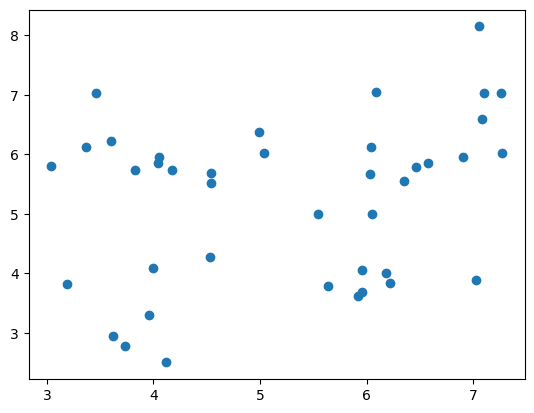

In [15]:
arousal = etiquetas[:,1]
valence = etiquetas[:,0]

emocion = np.zeros(np.size(arousal))
emocion[valence<=4] = 0
emocion[np.logical_and(valence>4 ,valence<=7)] = 1
emocion[valence>7] = 2

plt.scatter(valence,arousal)
plt.show()

In [16]:
dataFrame_total['Emocion'] = emocion
dataFrame_total['Emocion'] = dataFrame_total['Emocion'].astype('category')

dataFrame_total

,Tiempo promedio de subida - GSR,Promedio de la derivada para valores negativos,Potencia 1,Potencia 2,Potencia 3,Potencia 4,Potencia 5,Potencia 6,Potencia 7,Potencia 8,...,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Energía EOG,Emocion
0,4.091850,-15.012007,1.868121e+13,7.014595e+12,2.999005e+12,1.663974e+12,1.198868e+12,6.961509e+11,6.795836e+11,6.213951e+11,...,-107.962481,10123.115082,1.421734e+08,675.374102,129955.941281,3.825970e+09,1.809917e+06,7.395443e+06,4498.122807,1.0
1,1.101232,-9.986452,1.259167e+14,1.087536e+13,5.742367e+12,2.988792e+12,2.977333e+12,1.709914e+12,7.631195e+11,4.947185e+11,...,187.094366,10644.052330,2.979925e+08,-785.260431,250853.556126,5.662958e+09,2.835174e+06,1.198234e+07,68533.625017,2.0
2,1.000000,-22.478566,1.679031e+15,6.358820e+13,1.750019e+13,6.263121e+12,5.386674e+12,5.266075e+12,4.638835e+12,2.789963e+12,...,-199.469281,6743.690178,3.037588e+08,109.333299,58026.215026,4.568293e+08,3.880922e+06,7.084706e+06,16537.595874,1.0
3,1.022560,-20.384878,3.103473e+15,2.332410e+14,4.272041e+13,2.516746e+13,1.406273e+13,9.827145e+12,9.051759e+12,3.052054e+12,...,11.114611,2109.140168,1.457490e+07,-41.617158,4657.282286,4.170916e+07,1.253358e+06,3.118670e+06,3020.595981,1.0
4,1.373903,-16.954824,9.236739e+13,7.444566e+13,1.663730e+13,9.624812e+12,9.301550e+12,6.755003e+12,5.148768e+12,3.893101e+12,...,-53.232391,935.171917,2.460311e+07,-21.045649,12943.231315,8.738479e+07,1.366477e+06,6.782909e+06,22891.236103,2.0
5,1.032917,-11.214414,3.602547e+14,1.317920e+13,2.711923e+12,2.251534e+12,1.238705e+12,1.037827e+12,5.676002e+11,4.797515e+11,...,83.303662,2042.915239,5.863721e+07,314.964769,44244.768719,9.364258e+08,3.062164e+06,1.004414e+07,11012.754661,1.0
6,1.366911,-23.871547,2.308280e+14,1.597899e+14,2.152421e+13,2.879373e+12,2.112455e+12,1.727912e+12,1.162284e+12,1.071909e+12,...,79.425725,3657.823421,6.505981e+07,32.836724,6421.551282,4.895871e+07,2.141262e+06,4.421943e+06,17767.459662,2.0
7,1.000000,-15.618777,5.273134e+14,1.892391e+13,8.342727e+12,6.693087e+12,3.396377e+12,2.980859e+12,1.787214e+12,1.170836e+12,...,148.325917,3551.780400,1.668058e+08,303.097991,35743.725459,8.330519e+08,1.773891e+06,9.567732e+06,8957.788685,1.0
8,1.893531,-12.801477,9.917064e+12,5.897395e+12,5.453900e+12,2.573423e+12,2.445356e+12,1.849238e+12,7.162666e+11,7.146225e+11,...,-144.804741,14044.599951,2.285649e+08,14.231625,97461.127044,6.375484e+08,2.536533e+06,7.122269e+06,19895.961764,1.0
9,1.104773,-14.297336,8.021922e+13,6.496084e+12,2.716879e+12,2.115604e+12,1.834848e+12,1.671452e+12,9.470613e+11,7.282324e+11,...,128.878998,1846.628179,1.204835e+08,-38.326776,48630.821566,3.270513e+08,1.451202e+06,1.105573e+07,15843.939797,1.0


In [17]:
""""# Seaborn nos va a permitir hacer una análisis multivariado
import seaborn as sns
sns.set_theme(style="ticks")

dataFrame_total['Emocion'] = dataFrame_total['Emocion'].astype('category')

# Luego, crea el pairplot
sns.pairplot(dataFrame_total)"""


'"# Seaborn nos va a permitir hacer una análisis multivariado\nimport seaborn as sns\nsns.set_theme(style="ticks")\n\ndataFrame_total[\'Emocion\'] = dataFrame_total[\'Emocion\'].astype(\'category\')\n\n# Luego, crea el pairplot\nsns.pairplot(dataFrame_total)'

## Conclusiones

1. Conclusión 1.